In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("http://www.scipy-lectures.org/_downloads/populations.txt", delimiter = "\t")
arr = df.values

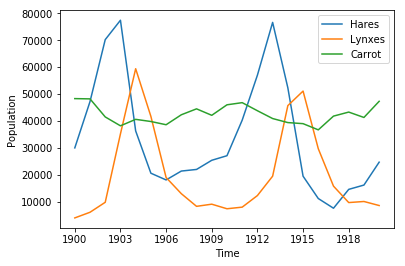

In [2]:
#1 Plot the populations for the years in the period. Add legend and axis labels to the plot.
plt.plot(arr[:,0], arr[:,1], label = "Hares")
plt.plot(arr[:,0], arr[:,2], label = "Lynxes")
plt.plot(arr[:,0], arr[:,3], label = "Carrot")
plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

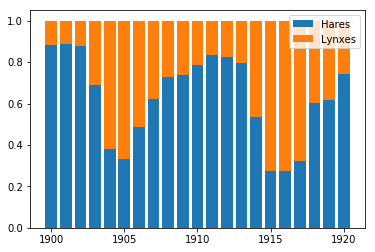

In [3]:
#2 Hares, Lynxes pop =100%, stacked graph (ratio in yeach year)
total = arr[:,1:3].sum(axis = 1)

plt.bar(arr[:,0], arr[:,1] / total, label = "Hares")
plt.bar(arr[:,0], arr[:,2] / total, bottom = arr[:,1] / total, label = "Lynxes")

plt.legend()
plt.show()

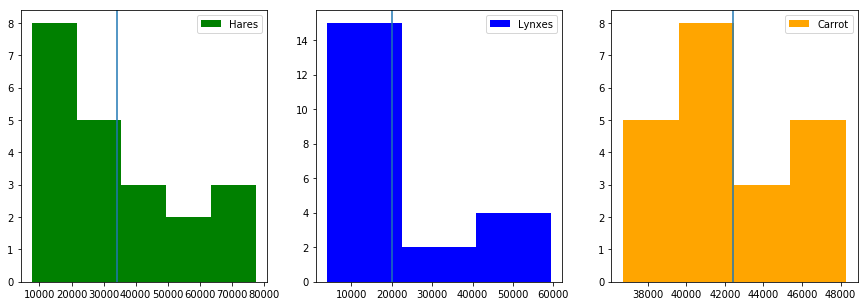

In [4]:
#3 mean, std of pop. Histogram of pop, mean values. 3 in a row
plt.figure(figsize=(15,5))
plt.subplot(1,3,1).hist(arr[:,1], bins = 5, color = "green", label = "Hares")
plt.axvline(arr[:,1].mean())
plt.legend()
plt.subplot(1,3,2).hist(arr[:,2], bins = 3, color = "blue", label = "Lynxes")
plt.axvline(arr[:,2].mean())
plt.legend()
plt.subplot(1,3,3).hist(arr[:,3], bins = 4, color = "orange", label = "Carrot")
plt.axvline(arr[:,3].mean())
plt.legend()
plt.show()

Hares' largest population in 1903 year.
Lynxes' largest population in 1904 year.
Carrots' largest population in 1900 year.


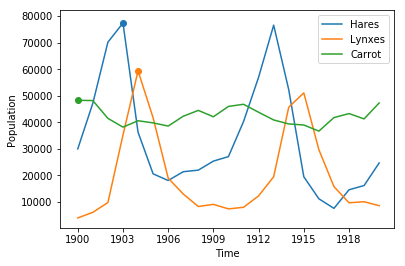

In [5]:
#4 Find which year each species had the largest population. Mark these years in the plot of populations.
plt.plot(arr[:,0], arr[:,1], label = "Hares")
plt.scatter((arr[np.where(arr[:,1] == arr[:,1].max()),0]), arr[:,1].max())
print("Hares' largest population in", int((arr[np.where(arr[:,1] == arr[:,1].max()),0])[0][0]), "year.")

plt.plot(arr[:,0], arr[:,2], label = "Lynxes")
plt.scatter((arr[np.where(arr[:,2] == arr[:,2].max()),0]), arr[:,2].max())
print("Lynxes' largest population in", int((arr[np.where(arr[:,2] == arr[:,2].max()),0])[0][0]), "year.")

plt.plot(arr[:,0], arr[:,3], label = "Carrot")
plt.scatter((arr[np.where(arr[:,3] == arr[:,3].max()),0]), arr[:,3].max())
print("Carrots' largest population in", int((arr[np.where(arr[:,3] == arr[:,3].max()),0])[0][0]), "year.")

plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")

plt.legend()
plt.show()

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


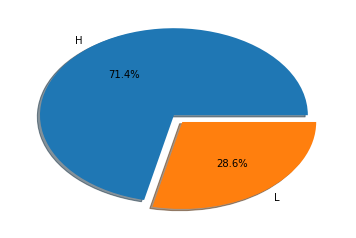

In [6]:
#5 Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.
a = np.repeat('L', arr.shape[0]) 
a[arr[:,1]>arr[:,2]] = 'H'
print(a);
mask = np.array([a == 'H'])
plt.pie([mask.sum(),len(mask[0]) - mask.sum()], explode = (0.05,0.05), labels = ["H", "L"], autopct = '%1.1f%%', shadow = True)
plt.show()

Years when population of Hares was above 50000: [1902. 1903. 1912. 1913. 1914.]
Years when population of Lynxes was above 50000: [1904. 1915.]
Years when population of Carrot was above 50000: []


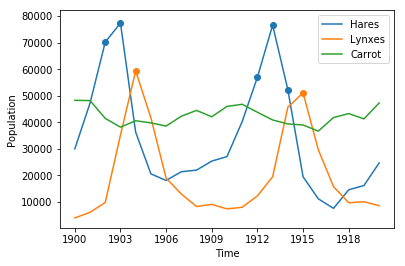

In [7]:
#6 years with pop >50000, time periods, plot
print("Years when population of Hares was above 50000:", (arr[np.where(arr[:,1] > 50000),0])[0])
print("Years when population of Lynxes was above 50000:", (arr[np.where(arr[:,2] > 50000),0])[0])
print("Years when population of Carrot was above 50000:", (arr[np.where(arr[:,3] > 50000),0])[0])

plt.plot(arr[:,0], arr[:,1], label = "Hares")
plt.scatter((arr[np.where(arr[:,1] > 50000),0])[0], (arr[np.where(arr[:,1] > 50000),1])[0])
plt.plot(arr[:,0], arr[:,2], label = "Lynxes")
plt.scatter((arr[np.where(arr[:,2] > 50000),0])[0], (arr[np.where(arr[:,2] > 50000),2])[0])
plt.plot(arr[:,0], arr[:,3], label = "Carrot")
plt.scatter((arr[np.where(arr[:,3] > 50000),0])[0], (arr[np.where(arr[:,3] > 50000),3])[0])

plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")

plt.legend()
plt.show()

In [8]:
#7 top 2 years with lowest pop for each pop
print("Hares had the lowest population in years", int((arr[np.where(arr[:,1] == arr[:,1].min()),0])[0][0]), "and", int((np.concatenate((arr[:(np.where(arr[:,1] == arr[:,1].min()))[0][0],0], arr[(np.where(arr[:,1] == arr[:,1].min()))[0][0]+1:,0]))).min()))
print("Lynxes had the lowest population in years", int((arr[np.where(arr[:,2] == arr[:,2].min()),0])[0][0]), "and", int((np.concatenate((arr[:(np.where(arr[:,2] == arr[:,2].min()))[0][0],0], arr[(np.where(arr[:,2] == arr[:,2].min()))[0][0]+1:,0]))).min()))
print("Carrot had the lowest population in years", int((arr[np.where(arr[:,3] == arr[:,3].min()),0])[0][0]), "and", int((np.concatenate((arr[:(np.where(arr[:,3] == arr[:,3].min()))[0][0],0], arr[(np.where(arr[:,3] == arr[:,3].min()))[0][0]+1:,0]))).min()))

Hares had the lowest population in years 1917 and 1900
Lynxes had the lowest population in years 1900 and 1901
Carrot had the lowest population in years 1916 and 1900


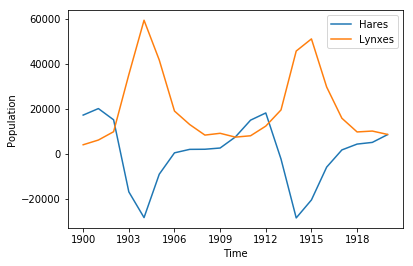

Correlation coefficient = 0.07189206073535571


In [9]:
#8 #7
plt.plot(arr[:,0], np.gradient(arr[:,1], 1.), label = "Hares")
plt.plot(arr[:,0], arr[:,2], label = "Lynxes")
plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

print("Correlation coefficient =", np.corrcoef(arr[:,1], arr[:,2])[0][1])

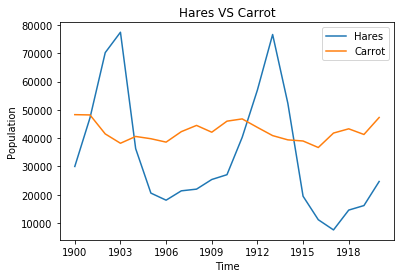

Hares - growth rate VS Carrot - population


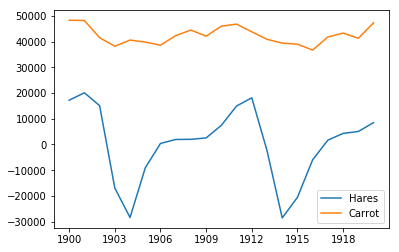

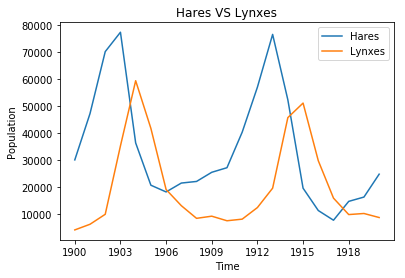

Hares - growth rate VS Lynxes - population


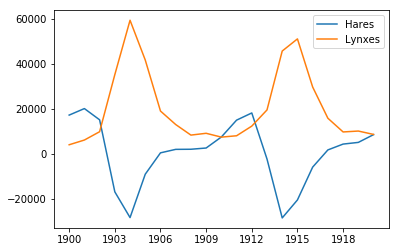

In [10]:
#9 
plt.title("Hares VS Carrot")

plt.plot(arr[:,0], arr[:,1], label = "Hares")
plt.plot(arr[:,0], arr[:,3], label = "Carrot")

plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")

plt.legend()
plt.show();

print("Hares - growth rate VS Carrot - population")
plt.plot(arr[:,0], np.gradient(arr[:,1], 1.), label = "Hares")
plt.plot(arr[:,0], arr[:,3], label = "Carrot")
plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(), 3))

plt.legend()
plt.show();

plt.title("Hares VS Lynxes")

plt.plot(arr[:,0], arr[:,1], label = "Hares")
plt.plot(arr[:,0], arr[:,2], label = "Lynxes")

plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(), 3))
plt.xlabel("Time")
plt.ylabel("Population")

plt.legend()
plt.show();

print("Hares - growth rate VS Lynxes - population")
plt.plot(arr[:,0], np.gradient(arr[:,1], 1.), label = "Hares")
plt.plot(arr[:,0], arr[:,2], label = "Lynxes")
plt.xticks(np.arange(arr[:,0].min(), arr[:,0].max(), 3))

plt.legend()
plt.show();